In [231]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

In [139]:
merged_census = pd.read_csv ('Merged_Census_data.csv')
merged_census.head()

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,Life Expectancy,Life Expectancy Range,MTW Status
0,Alabama,"Autauga County, AL",20100.0,11101.0,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,...,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049,73.1,56.9-75.1,Matching and updated
1,Alabama,"Autauga County, AL",20200.0,11101.0,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870,76.9,75.2-77.5,Matching and updated
2,Alabama,"Autauga County, AL",20300.0,11101.0,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,...,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070,NaN,NaN,Matching and updated
3,Alabama,"Autauga County, AL",20400.0,11101.0,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370,75.4,75.2-77.5,Matching and updated
4,Alabama,"Autauga County, AL",20500.0,11101.0,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640,79.4,77.6-79.5,Matching and updated


In [140]:
merged_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74103 entries, 0 to 74102
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         74103 non-null  object 
 1   county                        74103 non-null  object 
 2   tract                         74102 non-null  float64
 3   cz                            73094 non-null  float64
 4   czname                        73094 non-null  object 
 5   hhinc_mean2000                72393 non-null  float64
 6   mean_commutetime2000          72417 non-null  float64
 7   frac_coll_plus2000            72464 non-null  float64
 8   frac_coll_plus2010            73248 non-null  float64
 9   foreign_share2010             72378 non-null  float64
 10  med_hhinc1990                 72420 non-null  float64
 11  med_hhinc2016                 72954 non-null  float64
 12  popdensity2000                72739 non-null  float64
 13  p

In [141]:
# Check for Null Values.
df.isnull().sum()

state                           0
county                          0
tract                           0
cz                              0
czname                          0
hhinc_mean2000                  0
mean_commutetime2000            0
frac_coll_plus2000              0
frac_coll_plus2010              0
foreign_share2010               0
med_hhinc1990                   0
med_hhinc2016                   0
popdensity2000                  0
poor_share2010                  0
poor_share2000                  0
poor_share1990                  0
share_white2010                 0
share_black2010                 0
share_hisp2010                  0
share_asian2010                 0
share_black2000                 0
share_white2000                 0
share_hisp2000                  0
share_asian2000                 0
gsmn_math_g3_2013               0
rent_twobed2015                 0
singleparent_share2010          0
singleparent_share1990          0
singleparent_share2000          0
traveltime15_2

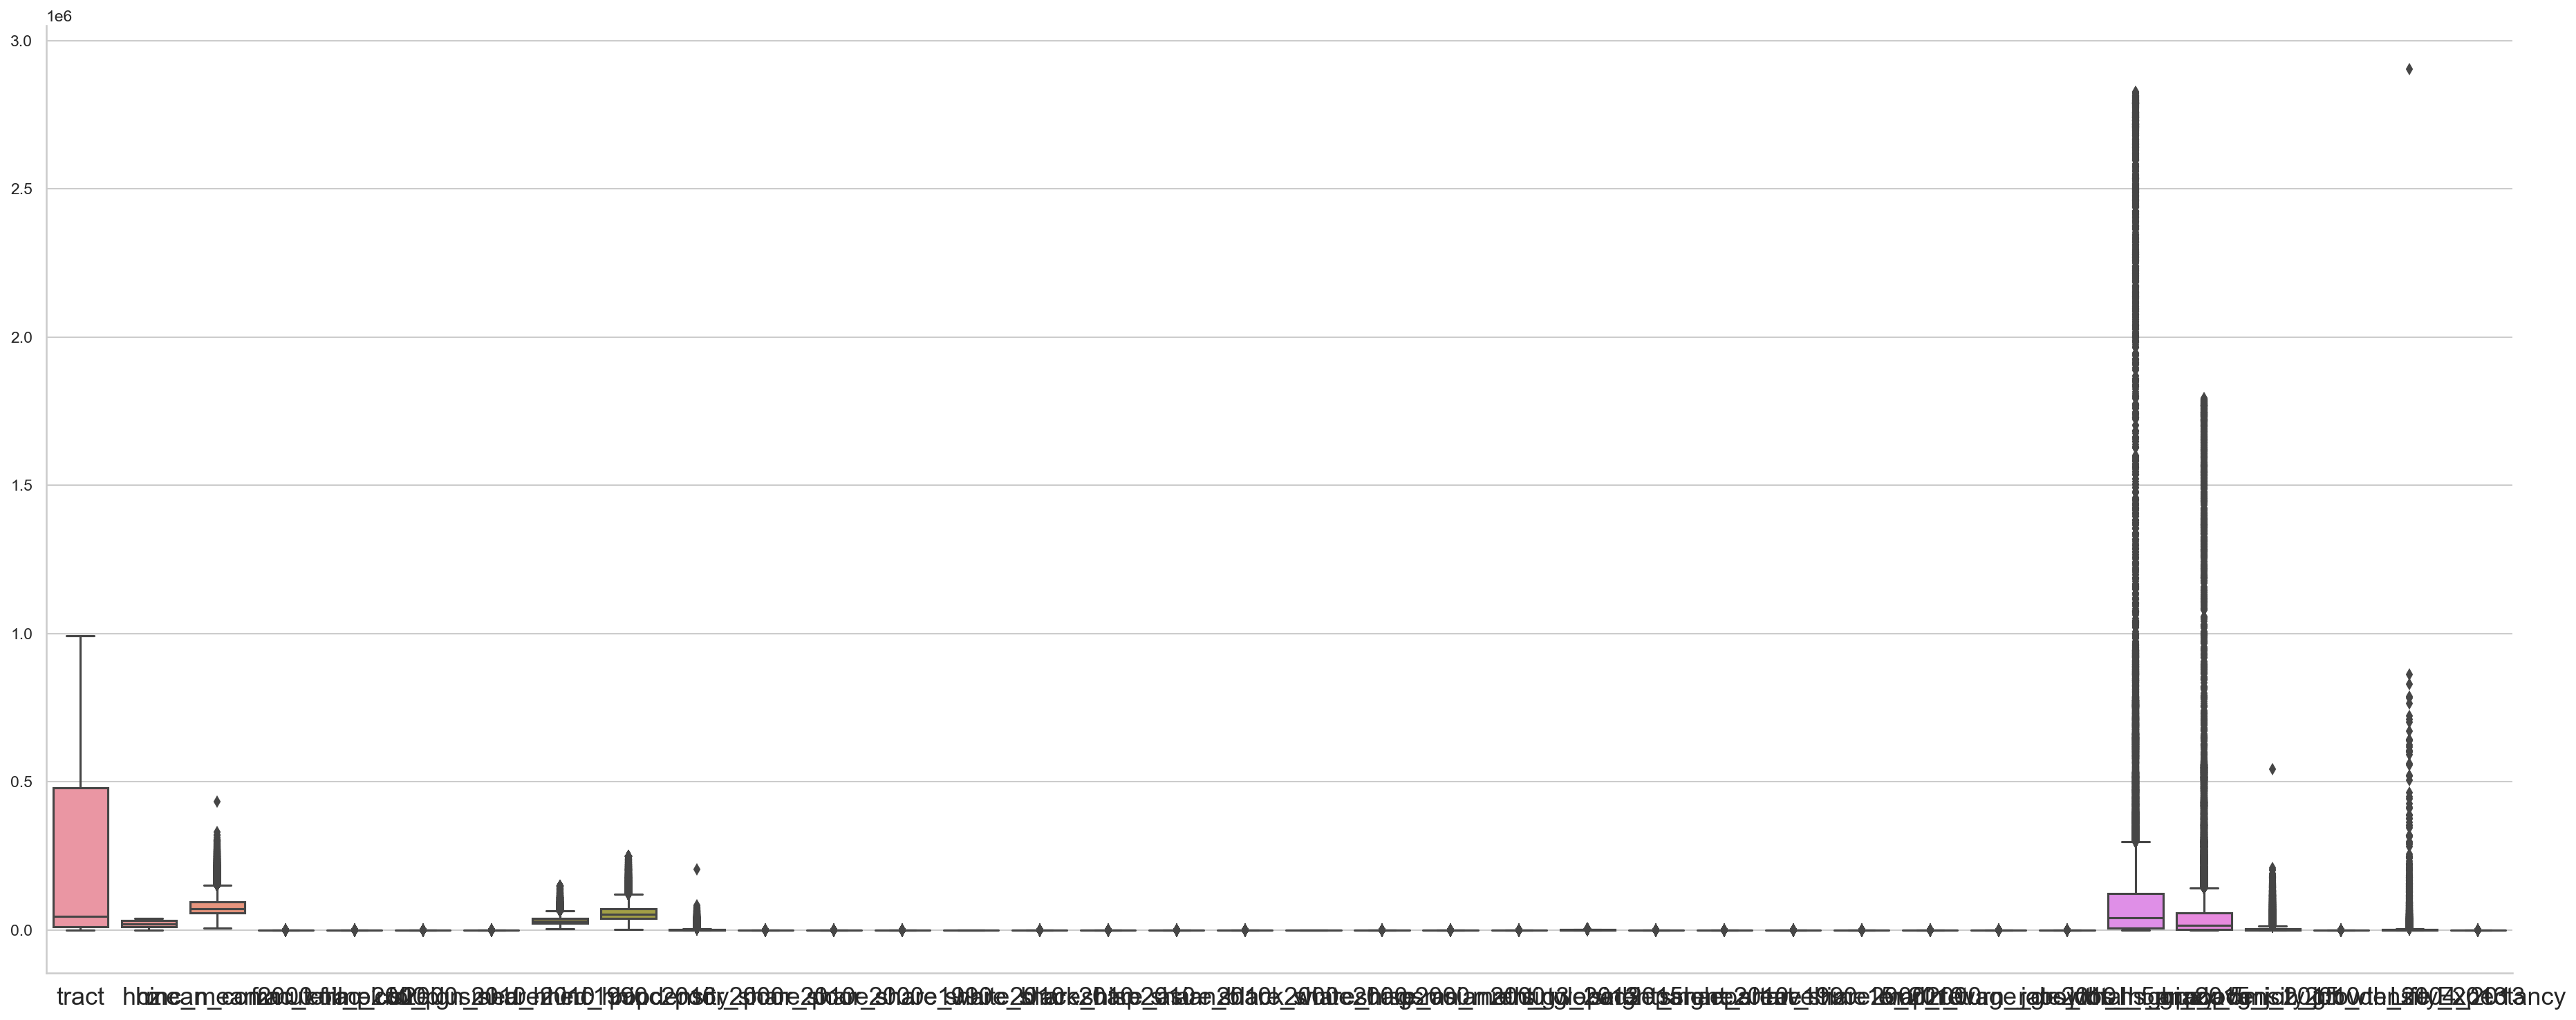

In [142]:
sns.factorplot(data=merged_census , kind='box' , size=10, aspect=2.5)

In [143]:
# Correlation Map
corr = df.corr('med_hhinc2016', 'Life Expectancy')

#sns.heatmap(data=corr, square=True , annot=True, cbar=True)

ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, 'med_hhinc2016' was supplied

In [145]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 


In [146]:
#Remove null values
#merged_census.dropna(subset=['med_hhcin2016'])
#merged_census.dropna(subset=['Life Expectancy'])
merged_census = pd.read_csv ('Merged_Census_data.csv')
merged_census = merged_census.dropna()

outcome_var = 'Life Expectancy'
model = LogisticRegression()
predictor_var = ['med_hhinc2016']
classification_model(model, merged_census, predictor_var, outcome_var)



ValueError: Unknown label type: 'continuous'

In [162]:
df = pd.read_csv ('Merged_Census_data.csv')
df.columns

Index(['state', 'county', 'tract', 'cz', 'czname', 'hhinc_mean2000',
       'mean_commutetime2000', 'frac_coll_plus2000', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc1990', 'med_hhinc2016', 'popdensity2000',
       'poor_share2010', 'poor_share2000', 'poor_share1990', 'share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010',
       'share_black2000', 'share_white2000', 'share_hisp2000',
       'share_asian2000', 'gsmn_math_g3_2013', 'rent_twobed2015',
       'singleparent_share2010', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'emp2000',
       'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013', 'Life_Expectancy',
       'Life_Expectancy_Range', 'MTW Status'],
      dtype='object')

In [163]:
df['Life_Expectancy']

0        73.1
1        76.9
2         NaN
3        75.4
4        79.4
         ... 
74098    79.4
74099    80.3
74100    75.3
74101    79.6
74102    78.8
Name: Life_Expectancy, Length: 74103, dtype: float64

In [164]:
df = pd.read_csv ('Merged_Census_data.csv')

#Remove null values
df =df.dropna()

#Encode variables
from sklearn.preprocessing import LabelEncoder
label_state = LabelEncoder()
label_county = LabelEncoder()
label_czname = LabelEncoder()
df['state'] = label_state.fit_transform(df['state'])
df['county'] = label_county.fit_transform(df['county'])
df['czname'] = label_czname.fit_transform(df['czname'])

#Set up variables for testing
feature_cols = ['med_hhinc2016', 'popdensity2000', 'traveltime15_2010', 'poor_share2010']

X = df[feature_cols]
y = df['Life_Expectancy']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [165]:
y_pred = regressor.predict(X_test)

In [166]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
69538,77.5,89.3
45555,79.4,86.8
16913,76.2,71.6
51774,74.0,78.3
50435,81.6,84.2
...,...,...
42810,81.6,73.3
27024,79.6,80.6
57137,85.0,75.9
53717,77.3,72.2


In [167]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.2387991186191702
Mean Squared Error: 17.4747851634227
Root Mean Squared Error: 4.180285296893347


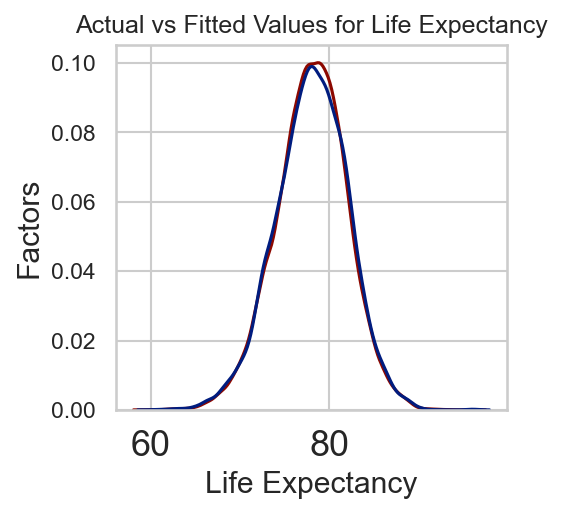

In [168]:
import seaborn as sns
plt.figure(figsize=(3, 3))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Factors')
plt.show()
plt.close()

In [170]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

#Best 
treereg2 = DecisionTreeRegressor(random_state=1)
treereg.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [171]:
# Use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4.204593659833805

In [172]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,med_hhinc2016,0.555679
1,popdensity2000,0.171841
2,traveltime15_2010,0.137577
3,poor_share2010,0.134903


In [256]:
#################### USING RANDOM FOREST MODEL ########################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.tree import DecisionTreeClassifier
import patsy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image 

In [233]:
df = pd.read_csv ('Merged_Census_data.csv')

# Remove rows with missing values.
df.dropna(inplace=True)
df.head()

,state,county,tract,cz,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,...,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,Life_Expectancy,Life_Expectancy_Range,MTW Status
1,Alabama,"Autauga County, AL",20200.0,11101.0,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,...,81.300003,0.089306,9948.0,3328.0,1682.170500,-0.004253,971.31787,76.9,75.2-77.5,Matching and updated
3,Alabama,"Autauga County, AL",20400.0,11101.0,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,...,83.500000,-0.072311,12933.0,3635.0,1780.032500,-0.019841,207.38637,75.4,75.2-77.5,Matching and updated
4,Alabama,"Autauga County, AL",20500.0,11101.0,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,...,77.300003,-0.096140,12933.0,3635.0,2446.262200,0.018627,800.27264,79.4,77.6-79.5,Matching and updated
5,Alabama,"Autauga County, AL",20600.0,11101.0,Montgomery,68095.766,21.630421,0.160706,0.239424,0.024985,...,82.800003,-0.048562,9193.0,3052.0,1184.372100,-0.051588,336.77753,73.1,56.9-75.1,Matching and updated
9,Alabama,"Autauga County, AL",20900.0,11101.0,Montgomery,66234.398,36.436531,0.089286,0.127820,0.009670,...,83.000000,0.035837,279.0,106.0,50.206135,0.001544,2.56560,73.9,56.9-75.1,Matching and updated


In [235]:
df.columns

Index(['state', 'county', 'tract', 'cz', 'czname', 'hhinc_mean2000',
       'mean_commutetime2000', 'frac_coll_plus2000', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc1990', 'med_hhinc2016', 'popdensity2000',
       'poor_share2010', 'poor_share2000', 'poor_share1990', 'share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010',
       'share_black2000', 'share_white2000', 'share_hisp2000',
       'share_asian2000', 'gsmn_math_g3_2013', 'rent_twobed2015',
       'singleparent_share2010', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'emp2000',
       'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013', 'Life_Expectancy',
       'Life_Expectancy_Range', 'MTW Status'],
      dtype='object')

In [236]:
abridged_df=df[['state', 'county', 'tract', 'czname', 
       'mean_commutetime2000', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc2016', 'poor_share2010', 'share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010','gsmn_math_g3_2013', 'rent_twobed2015',
       'singleparent_share2010', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013', 'Life_Expectancy']].copy()
abridged_df.head()

,state,county,tract,czname,mean_commutetime2000,frac_coll_plus2010,foreign_share2010,med_hhinc2016,poor_share2010,share_white2010,...,singleparent_share2000,traveltime15_2010,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,Life_Expectancy
1,Alabama,"Autauga County, AL",20200.0,Montgomery,24.806705,0.267194,0.016337,41107.0,0.147590,0.388940,...,0.392523,0.152040,81.300003,0.089306,9948.0,3328.0,1682.170500,-0.004253,971.31787,76.9
3,Alabama,"Autauga County, AL",20400.0,Montgomery,22.965347,0.252744,0.015083,52704.0,0.063223,0.918833,...,0.190722,0.350673,83.500000,-0.072311,12933.0,3635.0,1780.032500,-0.019841,207.38637,75.4
4,Alabama,"Autauga County, AL",20500.0,Montgomery,26.222353,0.375063,0.046488,52463.0,0.059569,0.783764,...,0.168000,0.250496,77.300003,-0.096140,12933.0,3635.0,2446.262200,0.018627,800.27264,79.4
5,Alabama,"Autauga County, AL",20600.0,Montgomery,21.630421,0.239424,0.024985,63750.0,0.105232,0.728462,...,0.288934,0.341646,82.800003,-0.048562,9193.0,3052.0,1184.372100,-0.051588,336.77753,73.1
9,Alabama,"Autauga County, AL",20900.0,Montgomery,36.436531,0.127820,0.009670,44591.0,0.099070,0.843348,...,0.237741,0.061808,83.000000,0.035837,279.0,106.0,50.206135,0.001544,2.56560,73.9


In [238]:
feature_cols = abridged_df.columns.drop('Life_Expectancy')
feature_cols

Index(['state', 'county', 'tract', 'czname', 'mean_commutetime2000',
       'frac_coll_plus2010', 'foreign_share2010', 'med_hhinc2016',
       'poor_share2010', 'share_white2010', 'share_black2010',
       'share_hisp2010', 'share_asian2010', 'gsmn_math_g3_2013',
       'rent_twobed2015', 'singleparent_share2010', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'mail_return_rate2010',
       'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013'],
      dtype='object')

In [239]:
#Encode variables
from sklearn.preprocessing import LabelEncoder
label_state = LabelEncoder()
label_county = LabelEncoder()
label_tract = LabelEncoder()
label_czname = LabelEncoder()
abridged_df['state'] = label_state.fit_transform(abridged_df['state'])
abridged_df['county'] = label_county.fit_transform(abridged_df['county'])
abridged_df['tract'] = label_county.fit_transform(abridged_df['tract'])
abridged_df['czname'] = label_czname.fit_transform(abridged_df['czname'])

In [3]:
# Define X and y.
X = abridged_df[feature_cols]
y = abridged_df.Life_Expectancy

NameError: name 'abridged_df' is not defined

In [ ]:
from sklearn.tree import export_graphviz
Export as dot file
export_graphviz(treereg.fit, out_file='tree.dot', 
                feature_names = feature_cols,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [4]:
# List of values to try for max_depth:
max_depth_range = range(1, 21)

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

NameError: name 'DecisionTreeRegressor' is not defined

In [5]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

NameError: name 'plt' is not defined

In [243]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

(2.784216491875027, 7)

In [1]:
# max_depth=7 is optimal and so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=6, random_state=1)
treereg.fit(X, y)

NameError: name 'DecisionTreeRegressor' is not defined

In [245]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
7,med_hhinc2016,0.599103
5,frac_coll_plus2010,0.129317
17,singleparent_share2000,0.111067
6,foreign_share2010,0.051575
14,rent_twobed2015,0.034936
10,share_black2010,0.033386
23,popdensity2010,0.013676
12,share_asian2010,0.008727
11,share_hisp2010,0.005642
25,job_density_2013,0.002319


NameError: name 'StringIO' is not defined

In [ ]:

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('Life Expectancy:')